Insalling the required libraries and importing

In [55]:
!pip install pandas
!pip install matplotlib
!pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from math import pi, sqrt, exp
from random import randrange, seed
from math import log
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 

Importing the datasets

In [57]:

# Function to load the dataset
dataset1_name = "Hayes-Roth Data Set"
dataset2_name = "Car Evaluation Data Set"
dataset3_name = "Breast Cancer Data Set"

column_name1 = ('Name', 'Hobby', 'Age', 'Educational level', 'Marital status', 'Class')
column_name2 = ('Buying', 'Maintenance', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class')
column_name3 = ('Class', 'Age', 'Menopause', 'Tumor_size', 'Inv_nodes', 'Node_caps', 'Deg_malig', 'Breast', 'Breast_quad', 'Irradiat')
column_name4 =['Age', 'Menopause', 'Tumor_size', 'Inv_nodes', 'Node_caps', 'Deg_malig', 'Breast', 'Breast_quad', 'Irradiat', 'Class']

hayes_roth_dataset_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/hayes-roth/hayes-roth.data'
car_eval_dataset_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
breast_cancer_dataset_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data'
def load_dataset(dataset_url, column_name):
  if (dataset_url == breast_cancer_dataset_link):
    dataset_import = pd.read_csv(dataset_url, names=column_name)
    dataset_import_new = dataset_import[column_name4]
    dataset_import_new1 = dataset_import_new[dataset_import_new.Breast_quad != "?"]
    dataset_import_new2 = dataset_import_new1[dataset_import_new1.Node_caps != "?"]
    return dataset_import_new2
  else:
    dataset_import = pd.read_csv(dataset_url, names=column_name)
    return dataset_import

Feature Engineering

In [58]:
#for car evaluation dataset
#Converting strings to integers
car_column_names = ["Buying", "Maintenance", "Doors", "Persons", "Lug_boot", "Safety", "Class"]
car_evaluation_dataset=load_dataset(car_eval_dataset_link, column_name2)[car_column_names]

# Assigning the values to car evaluation dataset using a dictionary
buying = dict([('low', 0), ('med', 1), ('high', 2), ('vhigh', 3)])
maint = dict([('low', 0), ('med', 1), ('high', 2), ('vhigh', 3)])
doors = dict([('2', 0), ('3', 1), ('4', 2), ('5more', 3)])
persons = dict([('2', 0), ('4', 1), ('more', 2)])
lug_boot = dict([('small', 0), ('med', 1), ('big', 2)])
safety = dict([('low', 0), ('med', 1), ('high', 2)])
class_dict = dict([('unacc', 0), ('acc', 1), ('good', 2),('vgood', 3)])


# Mapping the values as per specific columns
car_evaluation_dataset.Buying = car_evaluation_dataset.Buying.map(buying)
car_evaluation_dataset.Maintenance = car_evaluation_dataset.Maintenance.map(maint)
car_evaluation_dataset.Lug_boot=car_evaluation_dataset.Lug_boot.map(lug_boot)
car_evaluation_dataset.Safety=car_evaluation_dataset.Safety.map(safety)
car_evaluation_dataset.Doors=car_evaluation_dataset.Doors.map(doors)
car_evaluation_dataset.Persons=car_evaluation_dataset.Persons.map(persons)
car_evaluation_dataset.Class=car_evaluation_dataset.Class.map(class_dict)

In [59]:
#for breast cancer dataset
#Converting strings to integers

age = dict([('10-19', 0), ('20-29', 1), ('30-39', 2), ('40-49', 3), ('50-59', 4), ('60-69', 5), ('70-79', 6), ('80-89', 7), ('90-99', 8)])
menopause = dict([('lt40', 0), ('ge40', 1), ('premeno', 2)])
tumor = dict([('0-4', 0), ('5-9', 1), ('10-14', 2), ('15-19', 3), ('20-24', 4), ('25-29', 5), ('30-34', 6), ('35-39', 7), ('40-44', 8), ('45-49', 9), ('50-54', 10), ('55-59', 11)])
inv = dict([('0-2', 0), ('3-5', 1), ('6-8', 2), ('9-11', 3), ('12-14', 4), ('15-17', 5), ('18-20', 6), ('21-23', 7), ('24-26', 8), ('27-29', 9), ('30-32', 10), ('33-35', 11), ('36-39', 12)])
node_caps = dict([('yes', 0), ('no', 1)])
deg = dict([(1, 0), (2, 1), (3, 2)])
breast = dict([('left', 0), ('right', 1)])
breast_quad = dict([('left_up', 0), ('left_low', 1), ('right_up', 2), ('right_low', 3), ('central', 4)])
irradiat = dict([('yes', 0), ('no', 1)])
class_breast = dict([('no-recurrence-events', 0), ('recurrence-events', 1)])

# Assigning the values to car evaluation dataset using a dictionary
breast_dataset_values = ['Age', 'Menopause', 'Tumor_size', 'Inv_nodes', 'Node_caps', 'Deg_malig', 'Breast', 'Breast_quad', 'Irradiat', 'Class']
breast_dataset=load_dataset(breast_cancer_dataset_link, column_name3)[breast_dataset_values]

# Mapping the values as per specific columns
breast_dataset.Age = breast_dataset.Age.map(age)
breast_dataset.Menopause = breast_dataset.Menopause.map(menopause)
breast_dataset.Tumor_size=breast_dataset.Tumor_size.map(tumor)
breast_dataset.Inv_nodes=breast_dataset.Inv_nodes.map(inv)
breast_dataset.Node_caps=breast_dataset.Node_caps.map(node_caps)
breast_dataset.Deg_malig=breast_dataset.Deg_malig.map(deg)
breast_dataset.Breast=breast_dataset.Breast.map(breast)
breast_dataset.Breast_quad=breast_dataset.Breast_quad.map(breast_quad)
breast_dataset.Irradiat=breast_dataset.Irradiat.map(irradiat)
breast_dataset.Class=breast_dataset.Class.map(class_breast)

Class Seperation

In [60]:
# Distrubute the dataset as per the class
def class_dataset_distribution(data_values):
    seperated = {}
    for index, value in enumerate(data_values):
      if value[-1] not in seperated:
          seperated[value[-1]] = []
      seperated[value[-1]].append(data_values[index])
    return seperated

Calcutating the Mean

In [61]:
# Function to calculate mean
def find_mean(numbers):
    return sum(numbers)/(len(numbers))

Calcutating the Standard Deviation

In [62]:
# Function to calculate standard deviation
def find_std(numbers):
    num_len = len(numbers) - 1
    add_val = sum([(num-find_mean(numbers))**2 for num in numbers])
    return sqrt(add_val/num_len)

Values having mean, std, len

In [63]:
# returns mean, standard deviation and length

def data_values(dataset):
    data_values = ([*zip(*dataset)])
    mean_values =[]
    std_values = []
    len_values = []
    for row in data_values:
        mean_values.append(find_mean(row))
        std_values.append(find_std(row))
        len_values.append(len(dataset))
    ret_values = [*zip(mean_values, std_values, len_values)]
    # return the final values removing the class details using slicing
    ret_values = ret_values[:-1]
    return ret_values

Get the Summary of the class with their mean, std, len

In [64]:
# Returns mean, standard deviation and length with class in dict
def data_values_with_class(dataset):
    ret_summary = {}
    for value, row in class_dataset_distribution(dataset).items():
        ret_summary[value] = data_values(row)
    return ret_summary

Gaussian PDF where standard_deviation is the sigma in the pdf formula

In [65]:
# Gaussian PDF
def gaussian_pdf(x, mean, standard_deviation):
  if standard_deviation == 0:
    return 0
  elif x == None:
    x = 100
    return (1 / sqrt(2 * pi) * standard_deviation) * exp(-((x-mean)**2 / (2 * standard_deviation**2)))
  else:
    return (1 / sqrt(2 * pi) * standard_deviation) * exp(-((x-mean)**2 / (2 * standard_deviation**2)))

Class Probability

In [66]:
summary_val_index0 = 0
summary_val_index2= 2
def probability_of_class(summary_values, every_value, log_of_probability = False):
    probabilty_of_each_class = {}
    class_total_sum = 0
    # Calculate total number of rows
    for summary_value in summary_values:
        class_total_sum = class_total_sum + summary_values[summary_value][summary_val_index0][summary_val_index2]
    for cls, cls_value in summary_values.items():
        valuesofclass = (summary_values[cls][summary_val_index0][summary_val_index2])
        probability_class = valuesofclass/(class_total_sum)
        
        for index, val in enumerate(cls_value):       
            mean_val = cls_value[index][0]
            std_dev_val = cls_value[index][1]
            total_count_val = cls_value[index][2]
            gaussian_value = gaussian_pdf(every_value[index], mean_val, std_dev_val)
            if log_of_probability == False:
              probabilty_of_each_class[cls] = probability_class * gaussian_value
            else:
              probabilty_of_each_class[cls] = log(probability_class) * gaussian_value

    return probabilty_of_each_class

Validationg using K-Fold

In [67]:
import math

def k_fold_validation(dataset, number_of_folds):
    folded_dataset = []
    count_of_values_in_each_flod = int(math.ceil(len(dataset))/(number_of_folds))
    dataset_copy = list(dataset)
    # Looping across folds
    for a in range(number_of_folds):
        values_in_fold = []
        if (len(values_in_fold)) > count_of_values_in_each_flod:
            continue
        for k in range(0, count_of_values_in_each_flod):
            values_in_fold.append(dataset_copy.pop(randrange(len(dataset_copy))))
        folded_dataset.append(values_in_fold)
    return folded_dataset

Prediction

In [68]:
# Function to predict the class for the provided row in every_value
def predict_output(summaries_values, every_value, evaluate_log=False):
    best_label = 0
    best_probability = 0
    if evaluate_log == False:
      for each_class, each_probability in probability_of_class(summaries_values, every_value).items():
        if best_label == -2 and each_probability < best_probability:
            continue
        elif best_label is None or each_probability > best_probability:
            best_probability = each_probability
            best_label = each_class
    else:
      for each_class, each_probability in probability_of_class(summaries_values, every_value, True).items():
        if best_label == -2 and each_probability < best_probability:
            continue
        elif best_label is None or each_probability > best_probability:
            best_probability = each_probability
            best_label = each_class
    return best_label # Returning the best label

Naive Baye's

In [69]:
# Function for Naive Bayes Algorithm
def naive_bayes_algorithm(train_dataset, test_dataset, log_of_predicted = False):
    naive_bayes_predicted_values = []
    for each_row in test_dataset:
      if log_of_predicted == False:
        naive_bayes_predicted_values.append(predict_output(data_values_with_class(train_dataset), each_row))
      else:
        naive_bayes_predicted_values.append(predict_output(data_values_with_class(train_dataset), each_row, True))
    return naive_bayes_predicted_values 
    #returns the predictions values by naive bayes algorithm

Accuracy

In [70]:
# Calculate percentage of accuracy
def find_accuracy(correct_value, predicted_value):
    count_of_correctly_predicted_values = 0
    correct_predicted_set = zip(correct_value, predicted_value)
    for correct_val, predicted_val in correct_predicted_set:
        if correct_val == predicted_val:
            count_of_correctly_predicted_values = count_of_correctly_predicted_values + 1
    accuracy_percentage = 100 * (count_of_correctly_predicted_values) / (len(correct_value))
    return accuracy_percentage    

Verification using the dataset

In [71]:
def verify_naive_bayes(num_of_folds, algorithm, dataset, evaluate_log=False):
    k_fold_validation_seperated_folds = k_fold_validation(dataset, num_of_folds)
    accuracy_scores = []
    for values_in_each_fold in k_fold_validation_seperated_folds:
        empty_list = list()
        testing_dataset = []
        training_dataset = list(k_fold_validation_seperated_folds)
        training_dataset.remove(values_in_each_fold)
        training_dataset = sum(training_dataset, empty_list)
        for each_val_in_fold in values_in_each_fold:
            duplicate_row_value = list(each_val_in_fold)
            testing_dataset.append(list(each_val_in_fold))
            duplicate_row_value[-1+0] = None

        predicted_values_of_algorithm = algorithm(training_dataset, testing_dataset, evaluate_log)
        correct_values_list = list()
        for each_val_in_fold in values_in_each_fold:
            correct_values_list.append(each_val_in_fold[-1])
        accuracy_scores.append(find_accuracy(correct_values_list, predicted_values_of_algorithm))
    return accuracy_scores

num_of_folds = 10
scores_1 = verify_naive_bayes(num_of_folds, naive_bayes_algorithm, load_dataset(hayes_roth_dataset_link, column_name1).values.tolist()) # To run hayes roath dataset
scores_2 = verify_naive_bayes(num_of_folds, naive_bayes_algorithm, car_evaluation_dataset.values.tolist())  # To run Car evaluation dataset
scores_3 = verify_naive_bayes(num_of_folds, naive_bayes_algorithm, breast_dataset.values.tolist())  # To run Breast cancer dataset


print('Scores: %s' % scores_1)
print('Mean Accuracy: %.3f%%' % (sum(scores_1)/float(len(scores_1))))


print('Scores: %s' % scores_2)
print('Mean Accuracy: %.3f%%' % (sum(scores_2)/float(len(scores_2))))

print('Scores: %s' % scores_3)
print('Mean Accuracy: %.3f%%' % (sum(scores_3)/float(len(scores_3))))

Scores: [46.15384615384615, 69.23076923076923, 53.84615384615385, 30.76923076923077, 61.53846153846154, 30.76923076923077, 30.76923076923077, 53.84615384615385, 38.46153846153846, 53.84615384615385]
Mean Accuracy: 46.923%
Scores: [65.69767441860465, 70.34883720930233, 72.67441860465117, 73.25581395348837, 65.11627906976744, 65.69767441860465, 71.51162790697674, 73.83720930232558, 68.6046511627907, 72.67441860465117]
Mean Accuracy: 69.942%
Scores: [74.07407407407408, 70.37037037037037, 74.07407407407408, 62.96296296296296, 66.66666666666667, 74.07407407407408, 59.25925925925926, 70.37037037037037, 81.48148148148148, 62.96296296296296]
Mean Accuracy: 69.630%


Comparision

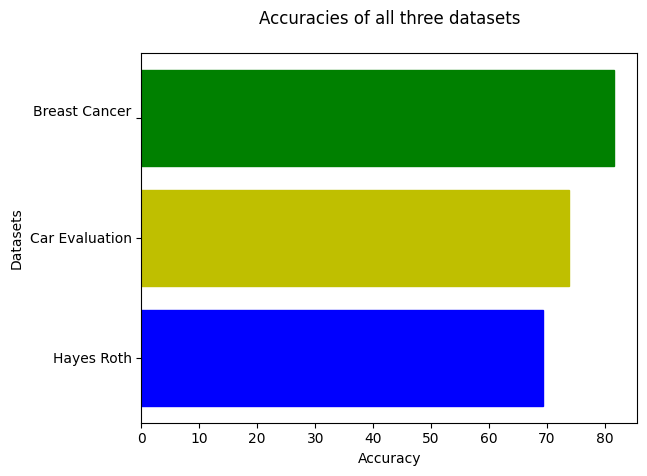

In [72]:
# Comparison the accuracies
scores = (max(scores_1), max(scores_2), max(scores_3))

accuracy = ["Hayes Roth","Car Evaluation","Breast Cancer\n"]
plt.title("Accuracies of all three datasets\n")
plt.xlabel("Accuracy")
plt.ylabel("Datasets")
chart = plt.barh(accuracy, scores)
chart[0].set_color('b')
chart[1].set_color('y')
chart[2].set_color('g')